<a href="https://colab.research.google.com/github/mondjisola/dpro_divic/blob/master/Decision_Tree_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Scratch implementation model

In [ ]:
class ScratchDecesionTreeClassifierDepth1():
    """
    Depth 1 decision tree classifier scratch implementation

    Parameters
    ----------
    verbose : bool
      True to output the learning process
    """

    def __init__(self, verbose=False):
        # Record hyperparameters as attributes
        self.verbose = verbose

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        """

        if self.verbose:
            # Output the learning process when verbose is set to True
            print()
        pass

    def predict(self, X):
        """
        Estimate the label using a decision tree classifier
        """

        pass
        return

## Function for finding impureness

In [ ]:
def _calc_gini(self,y):
  labels,counts = np.unique(y,return_counts=True)
  _gini = 0
  for label in labels:
      _gini += (counts[labels==label]/np.sum(counts))**2
  gini = 1 - _gini
  return gini

## Function for finding information gain

In [ ]:
def _calc_ig(self,X,feature_index,y,threshold):
  labels_l = y[X[:,feature_index] < threshold]
  labels_r = y[X[:,feature_index] >= threshold]
  gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
  gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
  gain = self._calc_gini(y) -gain_l -gain_r
  return gain

## Estimate

In [ ]:
import numpy as np
import collections

class ScratchDecesionTreeClassifierDepth1 ():
  def __init__(self, verbose=False):
      self.verbose = verbose

  def fit(self, X, y):
    self.gain = 0
    for feature_index in range(X.shape[1]):
        self.thresholds = np.unique(X[:,feature_index])
        for threshold in self.thresholds:
            _gain = self._calc_ig(X,feature_index,y,threshold)
            if _gain > self.gain:
                self.l_label = collections.Counter(y[X[:,feature_index] < threshold]).most_common()[0][0]
                self.r_label = collections.Counter(y[X[:,feature_index] >= threshold]).most_common()[0][0]
                self.feature = feature_index
                self.threshold = threshold
                self.gain = _gain
                if self.verbose:
                    print('feature',self.feature,'threshold',self.threshold,'gain',self.gain)

  def predict(self, X):
    prediction = np.where(X[:,self.feature] < self.threshold,self.l_label,self.r_label)
    return prediction

  def _calc_gini(self,y):
    labels,counts = np.unique(y,return_counts=True)
    _gini = 0
    for label in labels:
        _gini += (counts[labels==label]/np.sum(counts))**2
    gini = 1 - _gini
    return gini

  def _calc_ig(self,X,feature_index,y,threshold):
    labels_l = y[X[:,feature_index] < threshold]
    labels_r = y[X[:,feature_index] >= threshold]
    gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
    gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
    gain = self._calc_gini(y) -gain_l -gain_r
    return gain

## Learning and estimation

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
data = load_iris().data
target = load_iris().target.reshape(-1,1)
iris = np.concatenate([data,target],axis=1)
iris = pd.DataFrame(iris)
iris_X = iris.loc[iris[4]!=0,0:3].values
iris_y = iris.loc[iris[4]!=0,4].values
X = iris_X
y = iris_y
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=0)

In [ ]:
clf = ScratchDecesionTreeClassifierDepth1(verbose = True)
clf.fit(X_train,y_train)

feature 0 threshold 5.0 gain [0.00724638]
feature 0 threshold 5.5 gain [0.00757576]
feature 0 threshold 5.6 gain [0.02834467]
feature 0 threshold 5.7 gain [0.0624037]
feature 0 threshold 5.8 gain [0.08333333]
feature 0 threshold 6.0 gain [0.10407031]
feature 0 threshold 6.1 gain [0.10884354]
feature 0 threshold 6.2 gain [0.11834562]
feature 0 threshold 6.3 gain [0.13235294]
feature 2 threshold 4.3 gain [0.16037736]
feature 2 threshold 4.4 gain [0.17307692]
feature 2 threshold 4.5 gain [0.22916667]
feature 2 threshold 4.6 gain [0.30656013]
feature 2 threshold 4.7 gain [0.34780811]
feature 2 threshold 4.8 gain [0.41830065]


In [ ]:
# Scratch implementation estimation
y_pred_scratch = clf.predict(X_test)
y_pred_scratch

array([2., 2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 1., 1., 1., 2.,
       1., 2., 1., 1., 2., 1., 2., 1., 1., 1., 2., 2., 2.])

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Scikit-learn implementation
clf_sk = DecisionTreeClassifier(max_depth=1, random_state=0)
clf_sk.fit(X_train, y_train)
y_pred_sk = clf_sk.predict(X_test)

# Compare results
print("Accuracy (Scratch):", accuracy_score(y_test, y_pred_scratch))
print("Precision (Scratch):", precision_score(y_test, y_pred_scratch, average='macro'))
print("Recall (Scratch):", recall_score(y_test, y_pred_scratch, average='macro'))

print("Accuracy (Scikit-learn):", accuracy_score(y_test, y_pred_sk))
print("Precision (Scikit-learn):", precision_score(y_test, y_pred_sk, average='macro'))
print("Recall (Scikit-learn):", recall_score(y_test, y_pred_sk, average='macro'))

Accuracy (Scratch): 0.8666666666666667
Precision (Scratch): 0.8947368421052632
Recall (Scratch): 0.8666666666666667
Accuracy (Scikit-learn): 0.8666666666666667
Precision (Scikit-learn): 0.8947368421052632
Recall (Scikit-learn): 0.8666666666666667


The scratch implementation and scikit-learn implementation have the same accuracy, precision, and recall.

This suggests that the scratch implementation is working correctly and is comparable to the scikit-learn implementation for this specific depth-1 decision tree scenario.

The model has an accuracy of 0.8, indicating that it correctly predicts 80% of the test data.

The precision and recall values of 0.857 and 0.8 suggest that the model has a good balance between correctly identifying positive cases and avoiding false positives.

## Visualization of decision area

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def decision_region(X, y, clf):
    # Create a mesh grid over the range of the first two features
    mesh_f0, mesh_f1 = np.meshgrid(
        np.arange(np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1, 0.01),
        np.arange(np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1, 0.01)
    )

    # Create a mesh from the two feature grids
    mesh = np.c_[mesh_f0.ravel(), mesh_f1.ravel()]

    # Predict
    y_pred = clf.predict(mesh).reshape(mesh_f0.shape)

    # Plot decision region
    plt.title('Decision Region (Decision Tree)')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.contourf(mesh_f0, mesh_f1, y_pred, cmap=ListedColormap(['pink', 'skyblue']))
    plt.contour(mesh_f0, mesh_f1, y_pred, colors='red', linewidths=0.5)

    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label='Class 1', edgecolor='black')
    plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], label='Class 2', edgecolor='black')

    # Add a legend
    plt.legend()
    plt.show()

feature 0 threshold 2.2 gain [0.00724638]
feature 0 threshold 2.3 gain [0.00757576]
feature 0 threshold 2.4 gain [0.01384615]
feature 0 threshold 2.5 gain [0.02083333]
feature 0 threshold 3.0 gain [0.03316953]
feature 0 threshold 3.3 gain [0.03629032]
feature 1 threshold 4.0 gain [0.05555556]
feature 1 threshold 4.1 gain [0.09322034]
feature 1 threshold 4.2 gain [0.125]
feature 1 threshold 4.3 gain [0.16037736]
feature 1 threshold 4.4 gain [0.17307692]
feature 1 threshold 4.5 gain [0.22916667]
feature 1 threshold 4.6 gain [0.30656013]
feature 1 threshold 4.7 gain [0.34780811]
feature 1 threshold 4.8 gain [0.41830065]


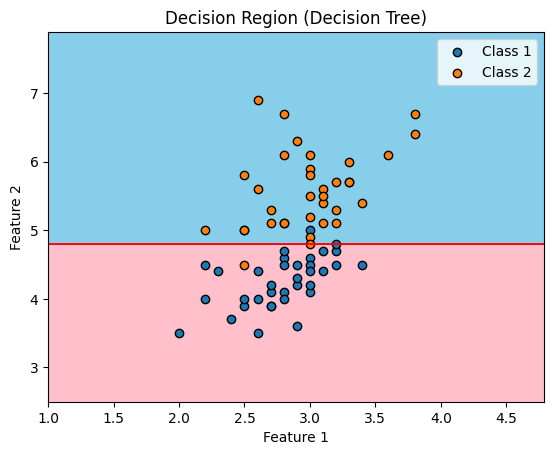

In [ ]:
# Ensure that X has only two features when fitting the model and plotting decision region
# Select randomly two features
X_slice = X_train[:, np.random.choice(X_train.shape[1], 2, replace=False)]
clf = ScratchDecesionTreeClassifierDepth1(verbose=True)
clf.fit(X_slice, y_train)

# Visualize decision region using the reduced dataset
decision_region(X_slice, y_train, clf)

## Creation of a decision tree classifier class with a depth of 2

In [ ]:
# @title Tree Node Class

import statistics

class Node():
    """
    A class that composes and separates the nodes of a decision tree.

    Parameters:
    ---------------
    verbose : bool
        True if you want to output the learning progress
    max_depth = int
        Maximum training depth of decision tree
    """
    def __init__(self, max_depth = None, verbose = False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth
        self.feature = None

    def _branch(self, X, y, depth):
        """
        Split nodes using the CART method.
        Parameters:
        ---------------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples,) of the following form
            Label value of training data
        depth : int
            the depth of node
        """
        self.depth = depth
        features = X.shape[1]

        if len(np.unique(y))  == 1:
            self.label = np.unique(y)[0]
            return

        if self.depth == self.max_depth:
            self.label = statistics.mode(y)
            return

        self.gain = 0

        for feature_index in range(X.shape[1]):
          self.thresholds = np.unique(X[:,feature_index])
          for threshold in self.thresholds:
              _gain = self._calc_ig(X,feature_index,y,threshold)
              if _gain > self.gain:
                  self.l_label = y[X[:,feature_index] < feature_index]
                  self.r_label = y[X[:,feature_index] >= feature_index]
                  self.feature = feature_index
                  self.threshold = threshold
                  self.gain = _gain
                  if self.verbose:
                      print('depth', self.depth, 'feature',self.feature,'threshold',self.threshold,'gain',self.gain)

        l_X = X[X[:,self.feature] < self.threshold]
        l_y = y[X[:,self.feature] < self.threshold]
        self.left = Node(self.max_depth, self.verbose)
        self.left._branch(l_X, l_y, depth + 1)

        r_X = X[X[:,self.feature] >= self.threshold]
        r_y = y[X[:,self.feature] >= self.threshold]
        self.right = Node(self.max_depth, self.verbose)
        self.right._branch(r_X, r_y, depth + 1)

    def _calc_gini(self, y):
        """
        Calculate Gini Impurity

        Parameters
        --------------
        X : ndarray, shape (n_samples,) of the following form
            Features of training data
        """
        labels, counts = np.unique(y, return_counts=True)
        _gini = 0
        for label in labels:
            _gini += (counts[labels==label]/np.sum(counts))**2
        gini = 1 - _gini
        return gini

    def _calc_ig(self,X,feature_index,y,threshold):
      labels_l = y[X[:,feature_index] < threshold]
      labels_r = y[X[:,feature_index] >= threshold]
      gain_l = (len(labels_l)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_l)
      gain_r = (len(labels_r)/(len(labels_l)+len(labels_r)))*self._calc_gini(labels_r)
      gain = self._calc_gini(y) -gain_l -gain_r
      return gain

    def _predict(self, X):
        """
        Estimate label
        """
        if self.feature == None or self.depth == self.max_depth:
            return self.label
        else:
            if X[self.feature] < self.threshold:
                return self.left._predict(X)
            else:
                return self.right._predict(X)

In [ ]:
class ScratchDecisionTreeClassifier():
    '''
    Scratch implementation of a decision tree classifier of depth 2

    Parameters:
    ---------------
    verbose : bool
        True if you want to output the learning progress
    max_depth = int
        Maximum training depth of decision tree
    '''

    def __init__(self, max_depth = 2, verbose = False):
        # Record hyperparameters as attributes
        self.verbose = verbose
        self.max_depth = max_depth

    def fit(self, X, y):
        """
        Learn the decision tree classifier
        Parameters
        ----------
        X : ndarray, shape (n_samples, n_features)
            Features of training data
        y : ndarray, shape (n_samples, )
            Label values of training data
        """

        self.depth = 0
        self.root = Node(self.max_depth, self.verbose)
        self.root._branch(X, y, self.depth)

    def predict(self, X):
        """"
        Estimate labels using a decision tree classifier
        """
        y_pred = np.zeros(len(X))

        for i, x in enumerate(X):
            y_pred[i] = self.root._predict(x)
        return y_pred

In [ ]:
clf2 = ScratchDecisionTreeClassifier(max_depth= 2, verbose = True)
clf2.fit(X_train, y_train)

pred = clf2.predict(X_test)
print('Predicted classes:', pred)
acc = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
print('Depth = 2 Scratch Desicion tree: Accuracy ',acc, 'Precision ', precision,'Recall', recall)

depth 0 feature 0 threshold 5.0 gain [0.00724638]
depth 0 feature 0 threshold 5.5 gain [0.00757576]
depth 0 feature 0 threshold 5.6 gain [0.02834467]
depth 0 feature 0 threshold 5.7 gain [0.0624037]
depth 0 feature 0 threshold 5.8 gain [0.08333333]
depth 0 feature 0 threshold 6.0 gain [0.10407031]
depth 0 feature 0 threshold 6.1 gain [0.10884354]
depth 0 feature 0 threshold 6.2 gain [0.11834562]
depth 0 feature 0 threshold 6.3 gain [0.13235294]
depth 0 feature 2 threshold 4.3 gain [0.16037736]
depth 0 feature 2 threshold 4.4 gain [0.17307692]
depth 0 feature 2 threshold 4.5 gain [0.22916667]
depth 0 feature 2 threshold 4.6 gain [0.30656013]
depth 0 feature 2 threshold 4.7 gain [0.34780811]
depth 0 feature 2 threshold 4.8 gain [0.41830065]
depth 1 feature 0 threshold 5.0 gain [0.05709343]
depth 1 feature 0 threshold 5.8 gain [0.00017637]
depth 1 feature 0 threshold 5.9 gain [0.00056117]
depth 1 feature 0 threshold 6.0 gain [0.00945216]
depth 1 feature 2 threshold 4.9 gain [0.02323893]
d

## Creation of decision tree classifier class with unlimited depth

In [ ]:
clf = ScratchDecisionTreeClassifier(max_depth= None, verbose = True)
clf.fit(X_train, y_train)

pred = clf.predict(X_test)
print('Predicted classes:', pred)
acc = accuracy_score(y_test, pred)
precision = precision_score(y_test, pred, average='micro')
recall = recall_score(y_test, pred, average='micro')
print('Depth = None Scratch Desicion tree: Accuracy', acc, 'Precision ', precision, 'Recall ',recall)

depth 0 feature 0 threshold 5.0 gain [0.00724638]
depth 0 feature 0 threshold 5.5 gain [0.00757576]
depth 0 feature 0 threshold 5.6 gain [0.02834467]
depth 0 feature 0 threshold 5.7 gain [0.0624037]
depth 0 feature 0 threshold 5.8 gain [0.08333333]
depth 0 feature 0 threshold 6.0 gain [0.10407031]
depth 0 feature 0 threshold 6.1 gain [0.10884354]
depth 0 feature 0 threshold 6.2 gain [0.11834562]
depth 0 feature 0 threshold 6.3 gain [0.13235294]
depth 0 feature 2 threshold 4.3 gain [0.16037736]
depth 0 feature 2 threshold 4.4 gain [0.17307692]
depth 0 feature 2 threshold 4.5 gain [0.22916667]
depth 0 feature 2 threshold 4.6 gain [0.30656013]
depth 0 feature 2 threshold 4.7 gain [0.34780811]
depth 0 feature 2 threshold 4.8 gain [0.41830065]
depth 1 feature 0 threshold 5.0 gain [0.05709343]
depth 1 feature 0 threshold 5.8 gain [0.00017637]
depth 1 feature 0 threshold 5.9 gain [0.00056117]
depth 1 feature 0 threshold 6.0 gain [0.00945216]
depth 1 feature 2 threshold 4.9 gain [0.02323893]
d